## Soil Classification: Tensorflow Model Evaluation
#### An introduction to image classification and model interpretation in Tensorflow
Peter Van Katwyk



# ___
### Background:
Classification of soils can be an extremely important skill in many different fields including geotechnical engineering, agricultural science, construction, and even the at-home gardening. While many classification schemes exist, a popular and intuitive way of classifying soils is based on soil grain size, such as gravel, silt, sand, etc. This is a rather simple way of looking at soil since there are firm cutoffs between each classification. For example, gravel is any grain over 2 mm in diameter, sand is between $\frac{1}{16}$ mm to 2 mm, and silt/clay is smaller than $\frac{1}{16}$ mm.  

### Objective
In this exercise, you will use computer vision to make a simple classification nodel of soils based on photos of gravel, sand, and silt. A convolutional neural network framework is provided below and will be used to complete the objective of the exercise. Your objective is to run several models, by changing key parameters such as the number of convolutional layers and the number of nodes in each convolutional layer within the CNN. Then, you will use the Keras callback Tensorboard to determine which model preformed best.
# ___
### Key Concepts:
#### Data Augmentation
Data Augmentation is a practice that is commonly used in image classification that enlarges the existing image dataset by augmenting the existing data. This augmentation is most commonly seen in operations like shifting the image, mirroring the image horizontally or vertically, zooming in on the image, and so on. These augmentations then create new images and thus enhance the number of images to train on. Since the dataset used in this exercise is my own, I did not take thousands of pictures and therefore it is a good idea to use data augmentation. Read more about this in a great article from Jason Brownlee seen here:
https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

#### Convolutional Neural Network (CNN)
A convolutional neural network (CNN) is a popular model for image classification. CNNs distinguish characteristics of an image by looping through the pixel values in an image and calculating the dot product of a those pixels with a filter "kernel" matrix. These kernel matrices help accentuate different aspects of the image such as vertical and horizontal lines, curvature, etc. For more information on the algorithm itself, see: https://www.youtube.com/watch?v=YRhxdVk_sIs. The example code seen in Part 2: Model Tuning is heavily commented for quick understanding of CNN model building.

#### Model Callbacks
Model callbacks in Tensorflow are tools that help store past model fits, analyze performance, and many more applications. See the documentation to learn about individual callbacks: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks. In this case, we will be using Tensorboad, which enables visualization of model fitting metrics in an interactive way. Each model fit iteration will save a file called an event, which we will use in Part 3: Model Evaluation to determine which model is most effective in predicting soil type. These files can then be loaded into various programs (like Tensorboard) to look useful information for each run.
# ___

### Part 1: Data Retrieval and Augmentation
To start, change the directory strings below to match where you have downloaded the train and test. The data can be downloaded from this link:  
- Train: https://drive.google.com/drive/folders/11wyib_0RIWSSHT8YPkaAM4_DfhShG9ei?usp=sharing
- Validation: https://drive.google.com/drive/folders/1v0RYcQMp9vuVCh_38jj5hLNqWV2xAEJ_?usp=sharing  

Also, create a folder called "callbacks" and change the path below to find that folder. This will be useful in Part 3 of the exercise.

Then, run the two cells below to load the data. 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
import time
import cv2

In [2]:
# Set filepaths for train directory, test directory folders, callback folder, and models folder.
# Download the train and validation data from the folders linked above and make your own callbacks/models folders
train_dir = r'C:/Users/Peter/Documents/ML Demo/train/'
validation_dir = r'C:/Users/Peter/Documents/ML Demo/validation/'
logdir = r'C:/Users/Peter/Documents/ML Demo/callbacks/'
models_dir = r'C:/Users/Peter/Documents/ML Demo/models/'

In [3]:
# DATA RETRIEVAL & AUGMENTATION

# Initiate the Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,                 # rescales image
    horizontal_flip = True,           # allows mirrored horizontal flip
    zoom_range = 0.2,                 # allows differing zooms
    rotation_range = 10,              # rotates photo
    shear_range = 0.2,                # shears photo
    height_shift_range = 0.1,         # shifts height of objects in photo
    width_shift_range = 0.1           # shifts width of objects in photo
)
# Use the Image Data Generator above to flow in photos from the directory
# Note that the subdirectories correspond the their respective classifications
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),        # resizes images to 128 x 128 pixels
    batch_size = 32,
    class_mode = 'categorical',
)

# Do the same for validation data.
val_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (128 ,128),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

# These lines above should have the data loaded in. The printed
# message should say:
# Found 263 images belonging to 3 classes.
# Found 64 images belonging to 3 classes.

Found 263 images belonging to 3 classes.
Found 64 images belonging to 3 classes.


### Part 2: Model Tuning
In this section you will use the example CNN code below and train multiple models with these parameters:
- 1 convolutional layer, 0 dense layers, 32 nodes
- 1 convolutional layer, 1 dense layer, 32 nodes
- 1 convolutional layer, 0 dense layers, 64 nodes
- 1 convolutional layer, 1 dense layer, 64 nodes

Create a loop that will initiate and fit these four models. Make sure to format the name of each model according to the loop iteration settings and make sure you have your callbacks saving in the right location. Also, be sure to save the model on each iteration for future use.  

Note: This will take about 15 minutes with 10 epochs in the fit function and 30 minutes with 20 epochs so be prepared!

In [4]:
# MODEL TUNING

# Start a timer
start = time.time()

for dense_layer in [0, 1]:
    for nodes in [32, 64]:
        # Establish unique name of the model
        NAME = f"{1}-conv-{nodes}-nodes-{dense_layer}-dense-{int(time.time())}"
        print(NAME)

        # Instantiate model
        model = Sequential()

        # 1 Convolutional Layer - add convolutional layer with filter matrix size 3x3
        model.add(Conv2D(filters = nodes, kernel_size = (3, 3), input_shape=(128,128, 3)))
        model.add(Activation('relu'))                   # Rectified linear unit activation function
        model.add(MaxPooling2D(pool_size=(2, 2)))       # Creates "pooled" 2x2 matrix of max values
        model.add(Flatten())                            # Flattens 2D layer to 1D to be passed into next layers
        
        # Loop through adding dense layers according to dense_layer
        for _ in range(dense_layer):
            model.add(Dense(nodes))
            model.add(Activation('relu'))

        # Output Layer
        model.add(Dense(3)) # 3 output nods for each classification
        model.add(Activation('softmax'))

        # Tensorboard Callbacks - save the logs to the logdir directory
        tensorboard = TensorBoard(log_dir=logdir + f"logs/{NAME}",histogram_freq=1,embeddings_freq=1,
                                  write_graph=True)
        
        # Compile Model
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'],
                      )
        
        # Fit model
        model.fit(train_generator,
                  epochs=20,
                  validation_data = validation_generator,
                  callbacks=[tensorboard],
                 ) 
        
        # Save model
        model.save(models_dir + f'{NAME}.h5')

# Stop timer
finish = str(round(time.time()-start,5))
print('Time Elapsed:', finish, 'seconds')

1-conv-32-nodes-0-dense-1618678946
Epoch 1/20
9/9 [==============================] - 23s 3s/step - loss: 9.2831 - accuracy: 0.2986 - val_loss: 5.7029 - val_accuracy: 0.6719
Epoch 2/20
9/9 [==============================] - 19s 2s/step - loss: 2.7460 - accuracy: 0.4972 - val_loss: 3.0071 - val_accuracy: 0.4219
Epoch 3/20
9/9 [==============================] - 21s 3s/step - loss: 1.1343 - accuracy: 0.5311 - val_loss: 1.2502 - val_accuracy: 0.6250
Epoch 4/20
9/9 [==============================] - 19s 2s/step - loss: 0.6540 - accuracy: 0.6771 - val_loss: 1.2007 - val_accuracy: 0.5469
Epoch 5/20
9/9 [==============================] - 19s 2s/step - loss: 0.5744 - accuracy: 0.8547 - val_loss: 1.1716 - val_accuracy: 0.6250
Epoch 6/20
9/9 [==============================] - 19s 2s/step - loss: 0.4929 - accuracy: 0.7898 - val_loss: 0.7148 - val_accuracy: 0.6562
Epoch 7/20
9/9 [==============================] - 19s 2s/step - loss: 0.3686 - accuracy: 0.9208 - val_loss: 0.8656 - val_accuracy: 0.6094

9/9 [==============================] - 20s 2s/step - loss: 1.0895 - accuracy: 0.4453 - val_loss: 1.0912 - val_accuracy: 0.4219
Epoch 20/20
9/9 [==============================] - 20s 2s/step - loss: 1.0905 - accuracy: 0.4282 - val_loss: 1.0907 - val_accuracy: 0.4219
1-conv-64-nodes-1-dense-1618680188
Epoch 1/20
9/9 [==============================] - 26s 3s/step - loss: 16.4579 - accuracy: 0.3673 - val_loss: 11.8532 - val_accuracy: 0.3906
Epoch 2/20
9/9 [==============================] - 22s 2s/step - loss: 7.4090 - accuracy: 0.3705 - val_loss: 1.4749 - val_accuracy: 0.2656
Epoch 3/20
9/9 [==============================] - 22s 2s/step - loss: 1.2117 - accuracy: 0.2671 - val_loss: 1.0314 - val_accuracy: 0.4219
Epoch 4/20
9/9 [==============================] - 21s 2s/step - loss: 0.9639 - accuracy: 0.4666 - val_loss: 0.9421 - val_accuracy: 0.6094
Epoch 5/20
9/9 [==============================] - 21s 2s/step - loss: 0.8569 - accuracy: 0.6183 - val_loss: 0.9066 - val_accuracy: 0.5312
Epoch 6

### Part 3: Model Evaluation
In this section we will be analyzing the individual model performances using the Tensorflow callback Tensorboard.  
Once your 4 models have trained, open up the command prompt on your computer (either anaconda or cmd). Navigate to the folder you titled "callbacks" above   (for example `cd Downloads/callbacks`).

Then, run this command:  
`tensorboard --logdir=logs/ --host=localhost`

At the end of all of the lines printed to the console will be a line that says something like:   
`TensorBoard 1.14.0 at http://localhost:6006/ (Press CTRL+C to quit)`

Open up the link (`http://localhost:6006/`) and take a look around. Make sure you toggle on all the model trains (you can filter only validation plots there as well) and take a look at the final validation loss for each model. Which preforms best? Which was worst?  

Report the accuracy of the best model and load the model using `tensorflow.keras.models.load_model` and the h5 file you saved above.

In [7]:
# MODEL EVALUATION
best_model_fp = r'C:\Users\Peter\Documents\ML Demo\models\1-conv-64-nodes-1-dense-1618677432.h5'
model = load_model(best_model_fp)

### Part 4: Model Prediction
With your loaded model, make a prediction the photos found in this folder:  
- Test: https://drive.google.com/drive/folders/1cqwucUf5O1IoHhUOakjfE61-MFPAgZxC?usp=sharing  

Make sure to load the photo, display the photo, and make a prediction. The file name indicates the correct label.

#### Hints:
- Load the image using tensorflow's image api: `from tensorflow.keras.preprocessing import image`, be sure to set the target_size to (128,128)
- Convert the image to an array using `image.img_to_array`
- Scale the image by dividing the image array by 255
- Expand the dimensions using `np.expand_dims`
- Remember that the `model.predict` function returns an array of probabilities for each classification. Find which index has the highest probability and compare that to the classification array (`classes = ['Gravel', 'Sand', 'Silt']`)

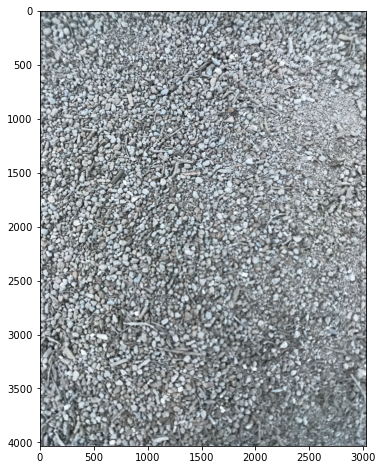

Classification: Sand


In [9]:
# MODEL PREDICTION

# View Image
picture_fp = r'C:\Users\Peter\Documents\ML Demo\test\Sand.JPG'
img = cv2.imread(picture_fp)
plt.figure(figsize = (15,8))
plt.imshow(img)
plt.show()

# Format for model
img = image.load_img(picture_fp, target_size = (128,128))
# Convert to an array and rescale it
img = image.img_to_array(img) 
img_array = img/255.
# Expand the dimensions for model prediction
img_expanded = np.expand_dims(img_array, axis = 0)
classes = ['Gravel', 'Sand', 'Silt']

# Make predictions
pred_array = model.predict(img_expanded)
max_pred = np.argmax(pred_array)
classification = classes[max_pred]

print('Classification:', classification)

How did the model perform? Choose 1 photo that was misclassified and give some potential reasons why it was incorrect. Then, talk about some ways that you could improve the model.